In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

# Assuming the file is in the root directory of your Google Drive
df = pd.read_csv("/content/drive/MyDrive/Sales_data.csv")
print(df)
df.isnull().sum()

In [ ]:
bins = [0, 12, 18, 60, 80]
labels = ['child', 'teen', 'adult', 'senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Create a boolean column indicating if fare is greater than 100
df['high_fare'] = df['fare'] > 100

<Axes: xlabel='Month'>

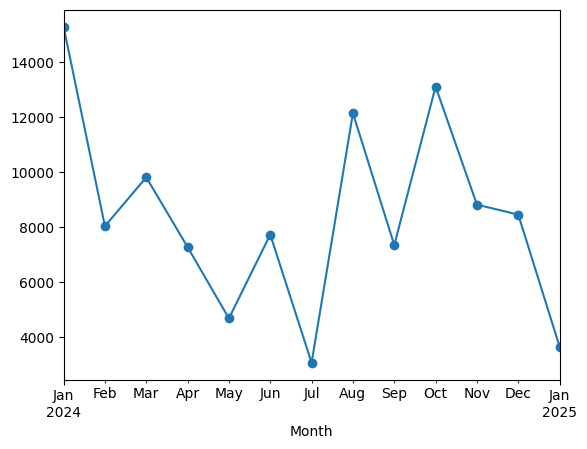

In [ ]:
df['Month'] = pd.to_datetime(df['Sale_Date']).dt.to_period('M')
monthly_avg = df.groupby('Month')['Total_Amount'].mean()
monthly_avg.plot(kind='line', marker='o')

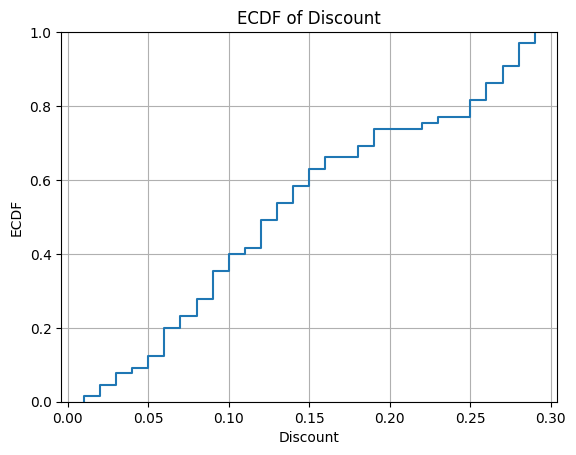

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the ECDF of 'Discount'
sns.ecdfplot(data=df, x='Discount')
plt.title('ECDF of Discount')
plt.xlabel('Discount')
plt.ylabel('ECDF')
plt.grid()
plt.show()

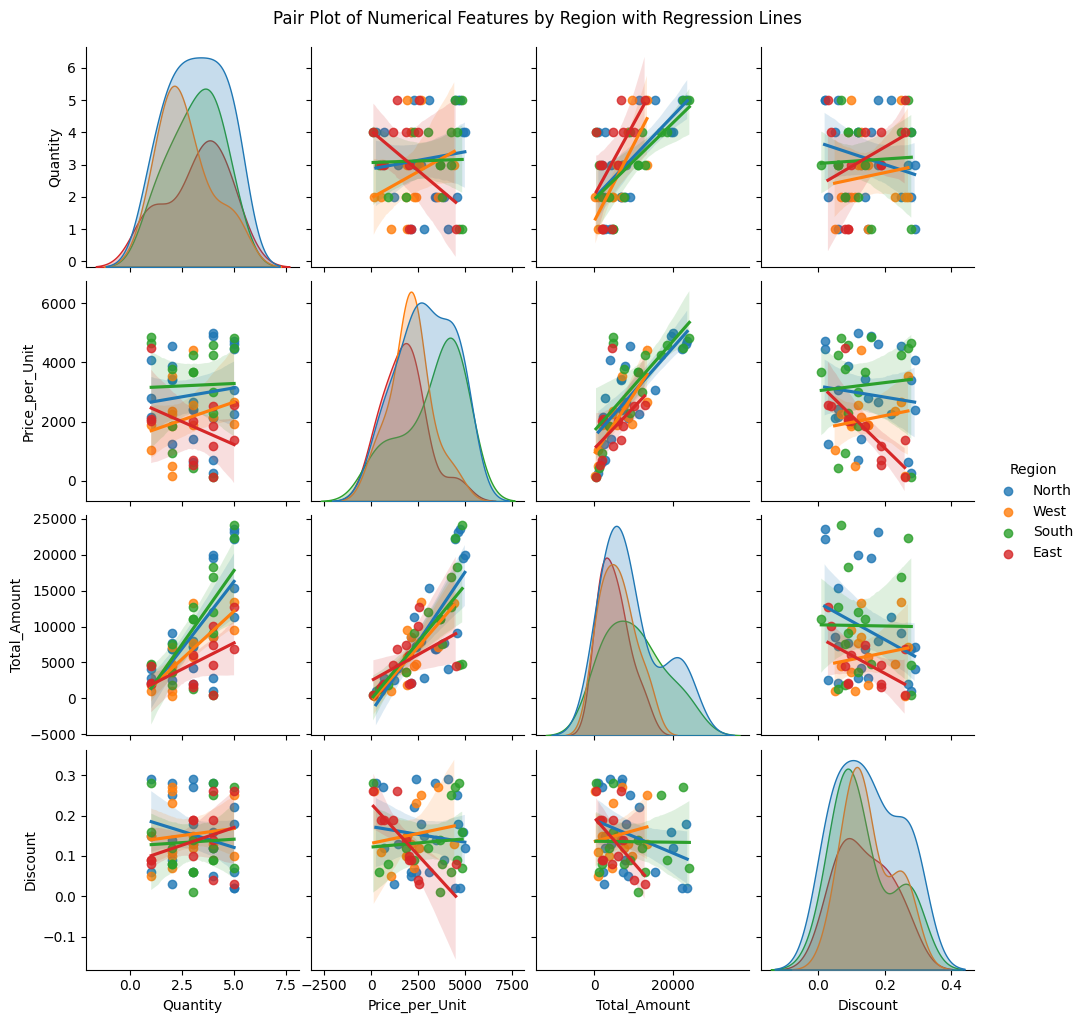

In [ ]:
import seaborn as sns

# Select only numerical features, excluding 'Unnamed: 11' and 'Sale_ID' as they are not suitable for pairplot
numerical_cols = df.select_dtypes(include=np.number).drop(columns=['Unnamed: 11', 'Sale_ID']).columns

# Create the pair plot with hue and kind set to 'reg'
sns.pairplot(df, vars=numerical_cols, hue='Region', kind='reg')
plt.suptitle('Pair Plot of Numerical Features by Region with Regression Lines', y=1.02)
plt.show()

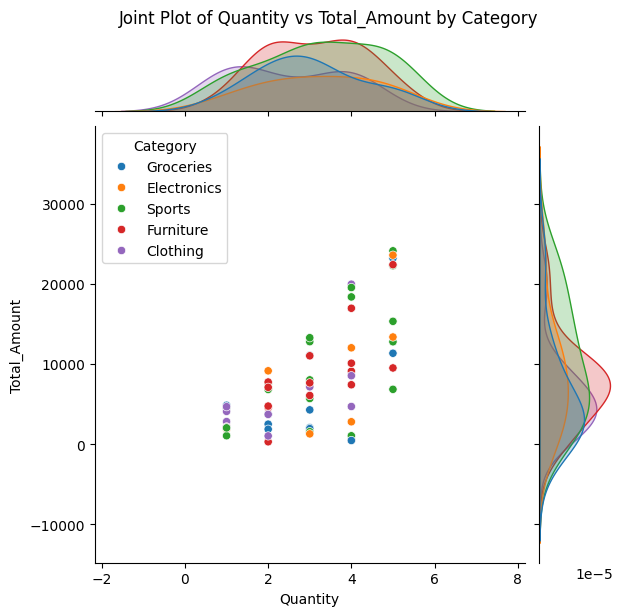

In [ ]:
# Create a joint plot
sns.jointplot(data=df, x='Quantity', y='Total_Amount', hue='Category')
plt.suptitle('Joint Plot of Quantity vs Total_Amount by Category', y=1.02)
plt.show()

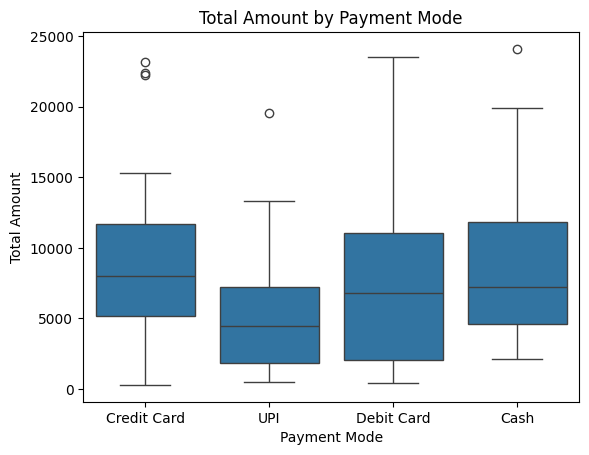

In [ ]:
# Create a box plot of Total_Amount by Payment_Mode
sns.boxplot(data=df, x='Payment_Mode', y='Total_Amount')
plt.title('Total Amount by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Total Amount')
plt.show()

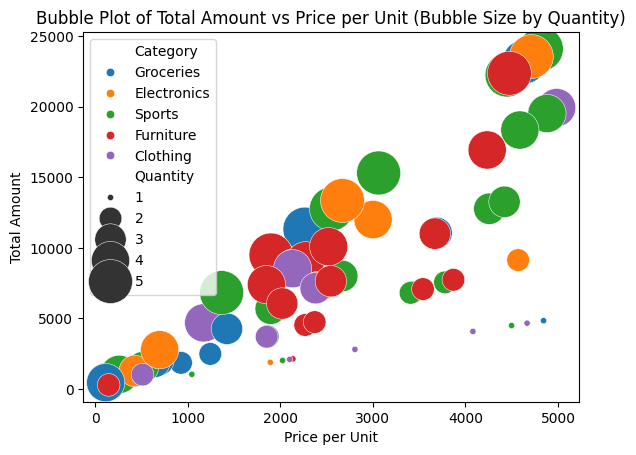

In [ ]:
# Create a bubble plot
sns.scatterplot(data=df, x='Price_per_Unit', y='Total_Amount', size='Quantity', hue='Category', sizes=(20, 1000))
plt.title('Bubble Plot of Total Amount vs Price per Unit (Bubble Size by Quantity)')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.show()

In [ ]:
df.drop(columns=['Unnamed: 11']).columns

Index(['Sale_ID', 'Customer_Name', 'Region', 'Category', 'Product', 'Quantity',
       'Price_per_Unit', 'Total_Amount', 'Sale_Date', 'Discount',
       'Payment_Mode'],
      dtype='object')

In [ ]:
display(df)

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode,Unnamed: 11
0,1,Neha Singh,North,Groceries,Wheat,2,1243,2486,1/12/2025,0.03,Credit Card,NaN
1,2,Parth Patel,West,Electronics,Mobile,1,1891,1891,4/29/2024,0.15,Credit Card,NaN
2,3,Meera Menon,South,Sports,Gym Equipment,2,3779,7558,10/28/2024,0.08,Credit Card,NaN
3,4,Pooja Nair,West,Groceries,Milk,2,1863,3726,1/25/2025,0.10,Credit Card,NaN
4,5,Manoj Bhat,North,Groceries,Milk,5,2266,11330,1/23/2024,0.22,Credit Card,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,Meera Menon,West,Furniture,Table,2,3541,7082,7/18/2024,0.27,Credit Card,NaN
61,62,Parth Patel,West,Furniture,Table,3,2546,7638,1/20/2025,0.12,Cash,NaN
62,63,Meera Menon,South,Furniture,Chair,3,3670,11010,9/5/2024,0.01,UPI,NaN
63,64,Manoj Bhat,South,Furniture,Chair,5,4475,22375,1/14/2024,0.27,Credit Card,NaN


In [ ]:
df = df.drop(columns=['Unnamed: 11'])
display(df.head())

KeyError: "['Unnamed: 11'] not found in axis"

In [ ]:
north_region_high_quantity = df.loc[(df['Region'] == 'North') & (df['Quantity'] > 3)]
display(north_region_high_quantity)

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode
4,5,Manoj Bhat,North,Groceries,Milk,5,2266,11330,1/23/2024,0.22,Credit Card
5,6,Manoj Bhat,North,Sports,Tennis Racket,5,3062,15310,10/22/2024,0.06,Credit Card
12,13,Priya Sharma,North,Clothing,Jeans,4,4985,19940,2/2/2024,0.12,Cash
16,17,Pooja Nair,North,Sports,Tennis Racket,4,259,1036,2/27/2024,0.28,UPI
20,21,Ananya Joshi,North,Groceries,Rice,5,4637,23185,4/27/2024,0.18,Credit Card
29,30,Priya Sharma,North,Sports,Gym Equipment,5,4450,22250,3/21/2024,0.02,Credit Card
31,32,Parth Patel,North,Sports,Football,4,4881,19524,10/16/2024,0.16,UPI
33,34,Harish Iyer,North,Electronics,Camera,5,4712,23560,2/21/2024,0.02,Debit Card
42,43,Ishita Roy,North,Clothing,Jacket,4,2132,8528,5/16/2024,0.05,Credit Card
53,54,Vikram Desai,North,Electronics,Laptop,4,696,2784,8/21/2024,0.12,Debit Card


In [ ]:
first_five_rows_four_columns = df.iloc[:5, :4]
display(first_five_rows_four_columns)

,Sale_ID,Customer_Name,Region,Category
0,1,Neha Singh,North,Groceries
1,2,Parth Patel,West,Electronics
2,3,Meera Menon,South,Sports
3,4,Pooja Nair,West,Groceries
4,5,Manoj Bhat,North,Groceries


In [ ]:
df_sorted = df.sort_values(by='Total_Amount', ascending=False)
display(df_sorted.head())

,Sale_ID,Customer_Name,Region,Category,Product,Quantity,Price_per_Unit,Total_Amount,Sale_Date,Discount,Payment_Mode
22,23,Simran Kaur,South,Sports,Cricket Bat,5,4820,24100,8/30/2024,0.07,Cash
33,34,Harish Iyer,North,Electronics,Camera,5,4712,23560,2/21/2024,0.02,Debit Card
20,21,Ananya Joshi,North,Groceries,Rice,5,4637,23185,4/27/2024,0.18,Credit Card
63,64,Manoj Bhat,South,Furniture,Chair,5,4475,22375,1/14/2024,0.27,Credit Card
29,30,Priya Sharma,North,Sports,Gym Equipment,5,4450,22250,3/21/2024,0.02,Credit Card


In [ ]:
# Calculate the mean of the 'Discount' column, excluding missing values
mean_discount = df['Discount'].mean()

# Replace missing values in the 'Discount' column with the mean
df['Discount'].fillna(mean_discount, inplace=True)

# Verify that there are no more missing values in the 'Discount' column
print(df['Discount'].isnull().sum())

0


/tmp/ipython-input-988346116.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount'].fillna(mean_discount, inplace=True)


In [ ]:
product_revenue = df.groupby('Product')['Total_Amount'].sum().sort_values(ascending=False)
top_3_products = product_revenue.head(3)
display(top_3_products)

,Total_Amount
Product,
Football,56370
Gym Equipment,51881
Sofa,43401


In [ ]:
west_region_df = df[df['Region'] == 'West']
average_discount_west = west_region_df['Discount'].mean()
print(f"The average discount in the West region is: {average_discount_west:.2f}")

The average discount in the West region is: 0.15


In [ ]:
regional_avg_amount = df.groupby('Region')['Total_Amount'].mean()
highest_avg_region = regional_avg_amount.idxmax()
highest_avg_amount_value = regional_avg_amount.max()

print(f"The region with the highest average Total_Amount is: {highest_avg_region}")
print(f"The highest average Total_Amount is: {highest_avg_amount_value:.2f}")

The region with the highest average Total_Amount is: South
The highest average Total_Amount is: 10129.19


In [ ]:
category_revenue = df.groupby('Category')['Total_Amount'].sum()
total_revenue = df['Total_Amount'].sum()
category_percentage = (category_revenue / total_revenue) * 100

print("Percentage contribution of each Category to total sales revenue:")
display(category_percentage.sort_values(ascending=False))

Percentage contribution of each Category to total sales revenue:


,Total_Amount
Category,
Sports,35.059716
Furniture,24.304333
Electronics,14.930629
Clothing,12.860117
Groceries,12.845205


In [ ]:
df['Profit_Margin'] = df['Total_Amount'] * 0.2
highest_profit_transaction = df.loc[df['Profit_Margin'].idxmax()]
display(highest_profit_transaction)

,22
Sale_ID,23
Customer_Name,Simran Kaur
Region,South
Category,Sports
Product,Cricket Bat
Quantity,5
Price_per_Unit,4820
Total_Amount,24100
Sale_Date,8/30/2024
Discount,0.07
